# **Orientation Filtering**

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from test_image import get_test_image

![](assets/oriented_energy.png)

In [27]:
def gaussian2(x, y, a=1, mu_x=0, mu_y=0, sig_x=1, sig_y=1):
    """ 2D Gaussian Window Function
        Inputs:
            x - horizontal location argument
            y - vertical location argument
            a - scalar amplitude 
            mu_x - x (horizontal) mean (controls horizontal center)
            mu_y - y (vertical) mean (controls vertical center)
            sig_x - x (horizontal) standard deviation (controls horizontal spread)
            sig_y - y (vertical) standard deviation (controls vertical spread)
        Outputs:
            output 2D Gaussian Function Response at x, y
        """
    return a*np.exp(- ((x - mu_x)**2)/(sig_x**2) - ((y - mu_y)**2)/(sig_y**2) )



def get_orientation_coeffs(x, y):
    """ Obtains the first 3 Orientation Coefficients that comprise 
        the Orientation Energy E = G**2 + H**2

        """
    # get circularly symmetric window
    window = np.exp(-(x**2 + y**2))
    
    # obtain even filter coefficients
    g2a = 0.9213*(2*(x**2) - 1)*window
    g2b = 1.843*x*y*window
    g2c = 0.9213*(2*(y**2) - 1)*window

    # obtain odd filter coefficients
    h2a = 0.9780*(-2.254*x + (x**3))*window
    h2b = 0.9780*(-0.7515 + (x**2))*y*window
    h2c = 0.9780*(-0.7515 + (y**2))*x*window
    h2d = 0.9780*(-2.254*y + (y**3))*window

    # compute Orientation Energy Coefficients
    C1 = 0.5*(g2b**2) + 0.25*g2a*g2c + 0.375*(g2a**2 + g2c**2) + 0.3125*(h2a**2 + h2d**2) + 0.5625*(h2b**2 + h2c**2) + 0.375*(h2a*h2c + h2b*h2d)
    C2 = 0.5*(g2a**2 - g2c**2) + 0.46875*(h2a**2 - h2d**2) + 0.28125*(h2b**2 - h2c**2) + 0.1875*h2a*h2c - h2b*h2d
    C3 = -(g2a*g2b) - (g2b*g2c) - 0.9375*(h2c*h2d + h2a*h2b) - 1.6875*h2b*h2c - 0.1875*h2a*h2d

    return C1, C2, C3



def get_orientation_coeffs(x, y, image):
    """ Obtains the first 3 Orientation Coefficients that comprise 
        the Orientation Energy E = G**2 + H**2

        """
    # get circularly symmetric window
    window = np.exp(-(x**2 + y**2))
    
    # obtain even filter coefficients
    g2a = 0.9213*(2*(x**2) - 1)*window
    g2b = 1.843*x*y*window
    g2c = 0.9213*(2*(y**2) - 1)*window

    # obtain odd filter coefficients
    h2a = 0.9780*(-2.254*x + (x**3))*window
    h2b = 0.9780*(-0.7515 + (x**2))*y*window
    h2c = 0.9780*(-0.7515 + (y**2))*x*window
    h2d = 0.9780*(-2.254*y + (y**3))*window

    # reshape 
    n = np.sqrt(x.shape[0]).astype(int)

    g2a = g2a.reshape((n, n))
    g2b = g2b.reshape((n, n))
    g2c = g2c.reshape((n, n))
    h2a = h2a.reshape((n, n))
    h2b = h2b.reshape((n, n))
    h2c = h2c.reshape((n, n))
    h2d = h2d.reshape((n, n))

    # get basis filter outputs
    g2a = cv2.filter2D(image, ddepth=-1, kernel=g2a)
    g2b = cv2.filter2D(image, ddepth=-1, kernel=g2b)
    g2c = cv2.filter2D(image, ddepth=-1, kernel=g2c)

    h2a = cv2.filter2D(image, ddepth=-1, kernel=h2a)
    h2b = cv2.filter2D(image, ddepth=-1, kernel=h2b)
    h2c = cv2.filter2D(image, ddepth=-1, kernel=h2c)
    h2d = cv2.filter2D(image, ddepth=-1, kernel=h2d)

    # compute Orientation Energy Coefficients
    C1 = 0.5*(g2b**2) + 0.25*g2a*g2c + 0.375*(g2a**2 + g2c**2) + 0.3125*(h2a**2 + h2d**2) + 0.5625*(h2b**2 + h2c**2) + 0.375*(h2a*h2c + h2b*h2d)
    C2 = 0.5*(g2a**2 - g2c**2) + 0.46875*(h2a**2 - h2d**2) + 0.28125*(h2b**2 - h2c**2) + 0.1875*h2a*h2c - h2b*h2d
    C3 = -(g2a*g2b) - (g2b*g2c) - 0.9375*(h2c*h2d + h2a*h2b) - 1.6875*h2b*h2c - 0.1875*h2a*h2d

    return C1, C2, C3

In [28]:
def get_xy(m, s=1):
    """ Obtains x and y indexes for desired number of filter taps 
        Inputs:
            m - number of taps (1 sided)
            s - spacing
        Outputs:
            x_indexes, y_indexes - column vectors of x and y indexes    
    """
    range_index = np.arange(-(m+s), (m+s) + s, s)
    x_index, y_index = np.meshgrid(range_index, range_index)
    x_index = x_index.reshape((-1, 1))
    y_index = y_index.reshape((-1, 1))

    return x_index, y_index

In [127]:
m = 4 # number of taps
s = 0.67 # spacing
theta = 0 # np.pi/4 # steering angle in radians

x_index, y_index = get_xy(m=m, s=s)
n = np.sqrt(x_index.shape[0]).astype(int)
C1, C2, C3 = get_orientation_coeffs(x_index, y_index)

TypeError: get_orientation_coeffs() missing 1 required positional argument: 'image'

In [11]:
C1 = C1.reshape((n, n))
C2 = C2.reshape((n, n))
C3 = C3.reshape((n, n))

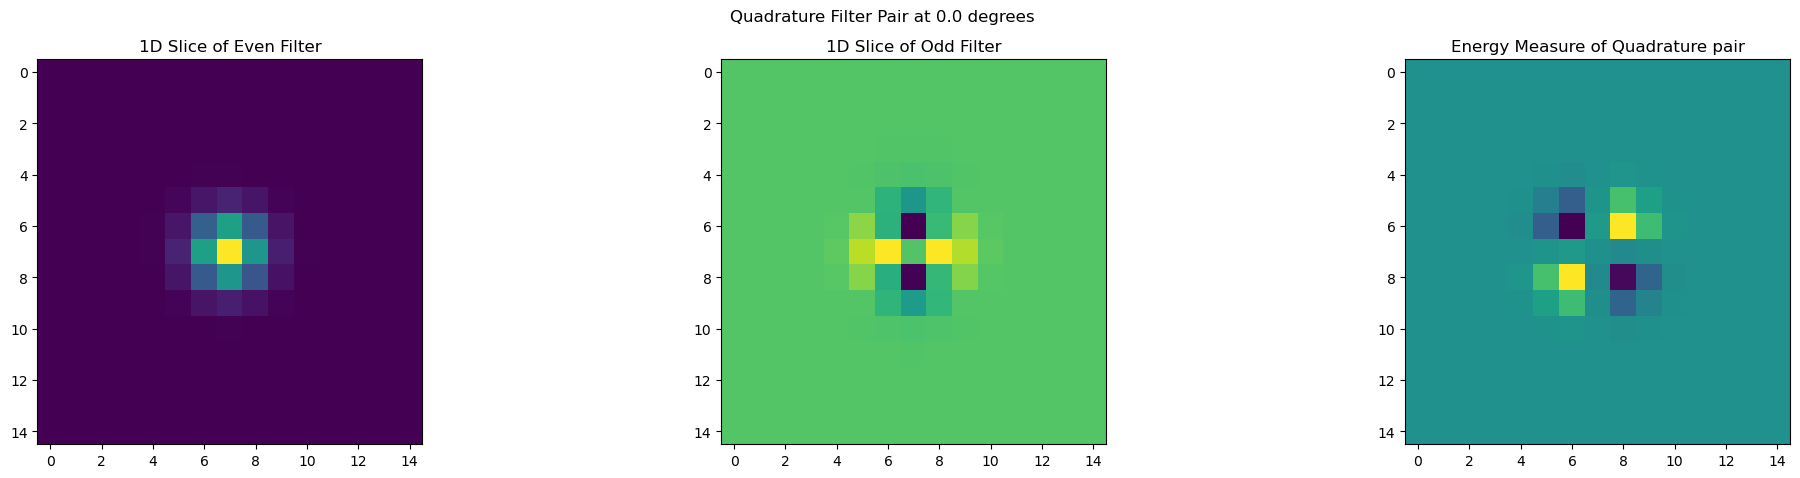

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(25, 5))
fig.suptitle(f"Coefficients")
ax[0].imshow(C1)
ax[0].set_title("C1")
ax[1].imshow(C2)
ax[1].set_title("C2"); 
ax[2].imshow(C3)
ax[2].set_title("C3"); 

In [112]:
from skimage.data import camera

test_image = camera()

# get complex test image
test_image = get_test_image(512).astype(np.float32)

# 0-1 normalize
test_image = cv2.normalize(test_image, None, 0, 1, cv2.NORM_MINMAX, dtype=cv2.CV_32FC1)

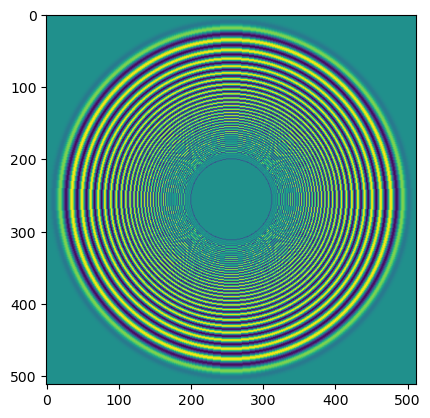

In [113]:
plt.imshow(test_image)

In [128]:
C1, C2, C3 = get_orientation_coeffs(x_index, y_index, test_image)

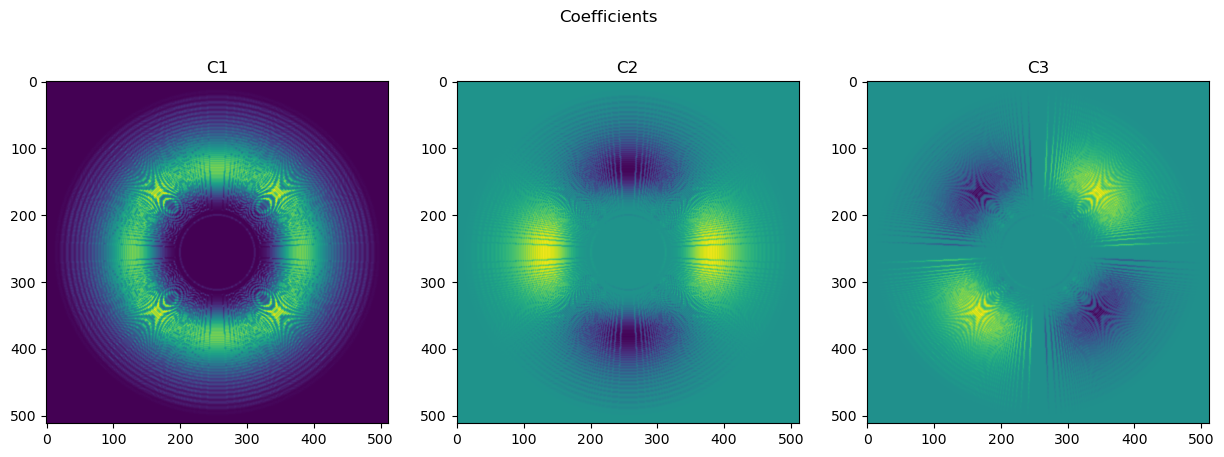

In [129]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle(f"Coefficients")
ax[0].imshow(C1)
ax[0].set_title("C1")
ax[1].imshow(C2)
ax[1].set_title("C2"); 
ax[2].imshow(C3)
ax[2].set_title("C3"); 

In [130]:
angle = np.arctan(C2, C3)/2
mag = np.sqrt(C2**2 + C3**2)

In [131]:
angle.shape

(512, 512)

In [132]:
angle.min(), angle.max()

(-0.6230859, 0.6137967)

In [133]:
np.degrees(angle[256, 400])

32.173073

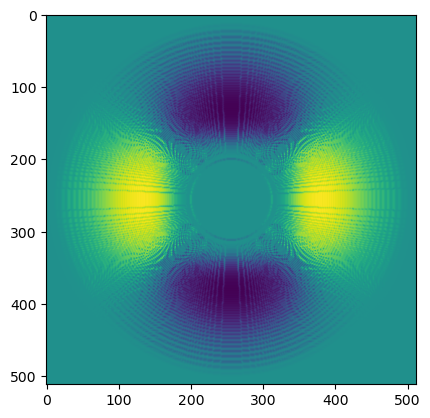

In [134]:
plt.imshow(angle)

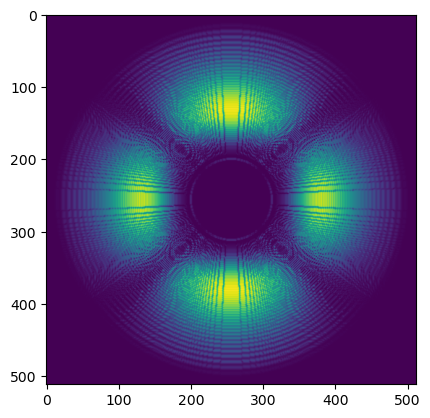

In [135]:
plt.imshow(mag)